In [1]:
%pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [160]:
# from google.colab import userdata
# import os

# os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
# os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')




In [ ]:
%kaggle competitions download -c higgs-boson-detection-2025
%unzip higgs-boson-detection-2025.zip

higgs-boson-detection-2025.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  higgs-boson-detection-2025.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [2]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
%cd ICS435/assignment3/

/home/vchan26/ICS435/assignment3


/home/vchan26/.conda/envs/ics435/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import xgboost as xgb
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score

import math


In [16]:
train_df = pd.read_csv('train.csv')
X_train_full = train_df.drop('label', axis=1)
y_train_full = train_df['label']

# Unlabeled data (e.g., test.csv provided without labels)
test_df = pd.read_csv('test.csv')
X_unlabeled = test_df  # Assuming test.csv has the same 28 features

xgb.set_config(verbosity=1)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, 
                                                  test_size=0.2, random_state=42)

In [13]:
initial_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=5000,
    learning_rate=0.004466022836585045,
    max_depth=11,
    reg_alpha=7.196356878367213e-07,
    min_child_weight=5,
    gamma=0,
    subsample=0.703237335080885,
    colsample_bytree=0.9949901696482174,
    reg_lambda=0.023281418194967988,
    early_stopping_rounds=200,
    eval_metric='auc',
    objective= 'binary:logistic',
    tree_method='hist',
    max_bin=256
)
initial_model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
feature_importance = initial_model.feature_importances_
selected_features = np.array(X_train.columns)[feature_importance > np.percentile(feature_importance, 20)] 
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

# Fit on selected features
initial_model.fit(X_train_selected, y_train, eval_set=[(X_val_selected, y_val)])

[0]	validation_0-auc:0.72537
[1]	validation_0-auc:0.74800
[2]	validation_0-auc:0.75673
[3]	validation_0-auc:0.76302
[4]	validation_0-auc:0.76913
[5]	validation_0-auc:0.77218


[6]	validation_0-auc:0.77405
[7]	validation_0-auc:0.77440
[8]	validation_0-auc:0.77519
[9]	validation_0-auc:0.77630
[10]	validation_0-auc:0.77632
[11]	validation_0-auc:0.77676
[12]	validation_0-auc:0.77693
[13]	validation_0-auc:0.77692
[14]	validation_0-auc:0.77832
[15]	validation_0-auc:0.77836
[16]	validation_0-auc:0.77829
[17]	validation_0-auc:0.77897
[18]	validation_0-auc:0.77924
[19]	validation_0-auc:0.77948
[20]	validation_0-auc:0.78006
[21]	validation_0-auc:0.78016
[22]	validation_0-auc:0.78029
[23]	validation_0-auc:0.78035
[24]	validation_0-auc:0.78040
[25]	validation_0-auc:0.78053
[26]	validation_0-auc:0.78087
[27]	validation_0-auc:0.78116
[28]	validation_0-auc:0.78154
[29]	validation_0-auc:0.78157
[30]	validation_0-auc:0.78154
[31]	validation_0-auc:0.78193
[32]	validation_0-auc:0.78217
[33]	validation_0-auc:0.78288
[34]	validation_0-auc:0.78298
[35]	validation_0-auc:0.78301
[36]	validation_0-auc:0.78322
[37]	validation_0-auc:0.78328
[38]	validation_0-auc:0.78357
[39]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9949901696482174, device=None,
              early_stopping_rounds=200, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.004466022836585045, max_bin=256,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [14]:
val_probs = initial_model.predict_proba(X_val_selected)[:, 1]
print("Initial Validation AUROC:", roc_auc_score(y_val, val_probs))

Initial Validation AUROC: 0.8062257919953054


In [30]:
X_unlabeled = X_unlabeled[selected_features]
unlabeled_probs = initial_model.predict_proba(X_unlabeled)[:, 1]
high_confidence_mask = (unlabeled_probs > 0.85) | (unlabeled_probs < 0.1)
high_confidence_mask = pd.Series(high_confidence_mask, index=X_unlabeled.index)
X_pseudo = X_unlabeled.loc[high_confidence_mask]
# Assign pseudo-labels based on a 0.5 threshold
y_pseudo = (unlabeled_probs[high_confidence_mask] > 0.5).astype(int)

print("Number of pseudo-labeled samples:", X_pseudo.shape[0])


Number of pseudo-labeled samples: 12215


In [31]:
X_combined = pd.concat([X_train_selected, X_pseudo], axis=0)
y_combined = np.concatenate([y_train, y_pseudo], axis=0)
semi_supervised_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=5000,
    learning_rate=0.004466022836585045,
    max_depth=11,
    reg_alpha=7.196356878367213e-07,
    min_child_weight=5,
    gamma=0,
    subsample=0.703237335080885,
    colsample_bytree=0.9949901696482174,
    reg_lambda=0.023281418194967988,
    early_stopping_rounds=200,
    eval_metric='auc',
    objective= 'binary:logistic',
    tree_method='hist',
    max_bin=256)

semi_supervised_model.fit(X_combined, y_combined, eval_set=[(X_val_selected, y_val)])
val_probs_semi = semi_supervised_model.predict_proba(X_val_selected)[:, 1]
print("Semi-Supervised Validation AUROC:", roc_auc_score(y_val, val_probs_semi))


[0]	validation_0-auc:0.73315
[1]	validation_0-auc:0.75335
[2]	validation_0-auc:0.76524


[3]	validation_0-auc:0.77149
[4]	validation_0-auc:0.77453
[5]	validation_0-auc:0.77441
[6]	validation_0-auc:0.77637
[7]	validation_0-auc:0.77707
[8]	validation_0-auc:0.77723
[9]	validation_0-auc:0.77954
[10]	validation_0-auc:0.78023
[11]	validation_0-auc:0.78121
[12]	validation_0-auc:0.78190
[13]	validation_0-auc:0.78207
[14]	validation_0-auc:0.78208
[15]	validation_0-auc:0.78253
[16]	validation_0-auc:0.78330
[17]	validation_0-auc:0.78400
[18]	validation_0-auc:0.78457
[19]	validation_0-auc:0.78479
[20]	validation_0-auc:0.78517
[21]	validation_0-auc:0.78517
[22]	validation_0-auc:0.78529
[23]	validation_0-auc:0.78524
[24]	validation_0-auc:0.78538
[25]	validation_0-auc:0.78514
[26]	validation_0-auc:0.78520
[27]	validation_0-auc:0.78512
[28]	validation_0-auc:0.78525
[29]	validation_0-auc:0.78552
[30]	validation_0-auc:0.78546
[31]	validation_0-auc:0.78551
[32]	validation_0-auc:0.78552
[33]	validation_0-auc:0.78555
[34]	validation_0-auc:0.78547
[35]	validation_0-auc:0.78555
[36]	validation_0

In [38]:
xv = X_val[selected_features].to_numpy()
y_pred_prob2 = clf.predict_proba(xv)[:, 1]

0.8092411988969033


Text(0, 0.5, 'True Positive Rate')

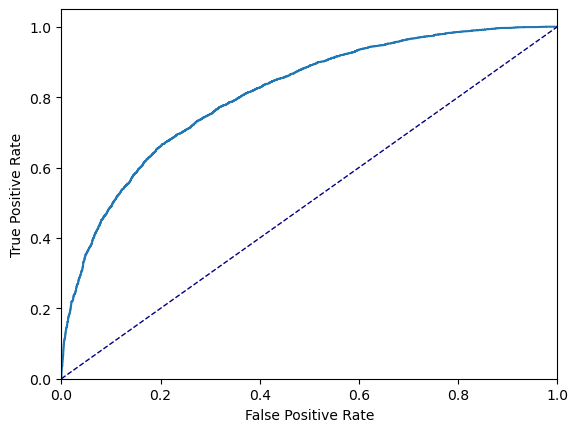

In [44]:
averaged_probabilities = (y_pred_prob * 0.9 + y_pred_prob2 * 0.1)


fpr, tpr, thresholds = metrics.roc_curve(y_val, averaged_probabilities, pos_label=1)
print(metrics.auc(fpr, tpr))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [ ]:
test = test[selected_features]
predictions = (initial_model.predict_proba(test)[:, 1] * 0.9 + clf.predict_proba(test.to_numpy())[:,1] * 0.1)

print(predictions)
ids = np.arange(len(predictions))
submission = np.column_stack((ids, predictions))
np.savetxt(fname='sumbision.csv', X=submission, header='Id,Predicted', delimiter=',', comments='')


[0.06213764 0.35488135 0.7593719  ... 0.9455498  0.17681159 0.1631918 ]
